<h1 style="color:blue; font-family:cursive;"><center>MINOR PROJECT</center></h1>


# **Medical Expenses Prediction**
<img src="https://thumbs.dreamstime.com/b/medical-expenses-illustration-concept-blue-background-medical-expenses-illustration-concept-blue-background-175337954.jpg">


##  Using the Linear Regression (Machine Learning)

The project is all about to predict the yearly medical expenses  on the basis of person physical health characteristics.<br>
The dataset we will be choosing for this project looks like:
<img src="https://i.imgur.com/87Uw0aG.png">

**The basic aim of this project is when a  person want to enquire for his yearly medical expenses.<br>The person needs to provide his details (age, sex, bmi, whether he is a smoker or not and his region) so the model will best predict his annual medical charges.** 

Major Libraries that we will be using :<br>
     For Data Analysis and visualisation are:<br>
     
        - Numpy that will be helpful for manipulating numpy arrays 
        
         - Pandas that will be used for creating pandas dataframe.
      
        - Matplotlib , Seaborn , Plotly for graphs and visualization 
        

For Training the Model :
 
     -Linear Regression using Scikit learn will be used Library(scikit-learn)

<h1 style="color:red; font-family:Sans-Serif; font-size:4rem"><center>Installing and importing libraries</center></h1>

In [1]:
!pip install numpy pandas matplotlib seaborn plotly scikit-learn --quiet 

You should consider upgrading via the 'C:\Users\ACER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

IMPORTING THE DATASET <br>
The dataset that will be used for this project is available on the url https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv <br>
It is present in csv (" comma seperated values" file format).<br>
we will first download the dataset into our local machine and then import using pandas .


In [3]:
from urllib.request import urlretrieve

In [4]:
dataset_url="https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [5]:
urlretrieve(dataset_url,"medical_ins");

Read the dataset using pandas read_csv function

<h1 style="color:red; font-family:Sans-Serif; font-size:4rem"><center>Data Preprocessing</center></h1>

In [6]:
medical_ins=pd.read_csv("medical_ins")

In [7]:
medical_ins

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

Data is successfully imported and converted to panda dataframe using the panda read_csv method

In [8]:
type(medical_ins)

pandas.core.frame.DataFrame

In [9]:
medical_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So the dataset contains a total of 1338 row entries indexing 0 to 1337 .<br>
All the values are present in the dataset. None of the value is missing . But, there might be chances of some wrong (negative/outliars) values in the datset. we will see those as we proceed further.

**We have a total of 7 attributes out of which six are the input attributes and the charges attribute will be our target attribute.** 

In [10]:
medical_ins.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

**The Inferences from the data** :</br>
    1.Minimum Age is 18 and the maximum is 64 .So the age attribute quite looks good and there is no  outlier.<br>
    2. BMI also looks in a range and there seems not any outlier and so are the Children attribute data and charges data.

<h1 style="color:red; font-family:Sans-Serif; font-size:4rem"><center>Exploratory Data Analysis</center></h1>

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.


**Importing the matplotlib , matplotlib.pyplot as plt , plotly.express as px and seaborn as sns libraries**

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
medical_ins

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

First see how charges affects the charges by plotting the lineplot 

In [13]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [14]:
medical_ins.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
fig=px.histogram(medical_ins,x='age',nbins=47)
fig.update_layout(bargap=0.1)

Most of the people that are taking insurance are in the age of 18 and 19. The count of people above age 19 who are taking insurance are in the same range. The reason for such trend could be the fact that 18-20 is the age when people gain more financial as well as social awareness.

### BMI
        Now we will look at the distribution of BMI .We will plot histogram to visualize.


<img src="https://i.imgur.com/lh23OiY.jpg">

In [16]:
fig2=px.histogram(medical_ins,x='bmi', marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig2.update_layout(bargap=0.1)

Most people BMI is centred toward the range of 30 with some of outliers.

In [17]:
px.violin(medical_ins,x='age',y='bmi')

#### Now lets check the distributin of charges w.r.t the smoker by plotting histogram

In [112]:
fig2=px.histogram(medical_ins,x='charges', color='smoker',marginal='box', 
                   color_discrete_sequence=['green','blue'], 
                   title='')
fig2.update_layout(bargap=0.2)

Yeah it quite seems interesting that , most of the people who smokes have higher medical expenses thean non smokers Which shows the the smoker attribute is one of the key factor in predicting the medical expenses of a person.

**Now let us see the relationship of age vs the charges** 

In [19]:
px.scatter(medical_ins,x='age',y='charges')

Yeah quite seems a linear relationship between age and the charges ,As the age increases ,the charges alse increases .<br>
Some of the outliers also available.<br>

**Now let us draw again this plot by hueing the smoker and nonsmoker.** 

In [20]:
px.scatter(medical_ins,x='age',y='charges',color='smoker')

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     



So from the observations through visualization ,it is more look like age ,bmi and smoking factors are more "CORRELATED" for deterimining the Charges. <br>
So let us found that which factors are more correlated to the output.<br>
Here we will using the 'corr' method of pandas to find correlation between the attributes.


In [21]:
medical_ins.charges.corr(medical_ins.age)

0.2990081933306478

In [22]:
medical_ins.charges.corr(medical_ins.bmi)

0.19834096883362887

In [23]:
medical_ins

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

To check the correlation of smoker attribute ,we need to convert smoker column to the numeric column.

In [24]:
smoker_df={'no':0,'yes':1}

In [25]:
smoker_values=medical_ins.smoker.map(smoker_df)

In [26]:
smoker_values

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

now we can correlate smoker attribute with charges attribute easily.

In [27]:
medical_ins.charges.corr(smoker_values)

0.7872514304984778

So it seems that the smoker attribute is really highly effects the charges. Smoker attribute will play a major role in creating a model for predicting charges.


Correlation is also visulize using the heatmap -

In [28]:
medical_ins.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

<AxesSubplot:>

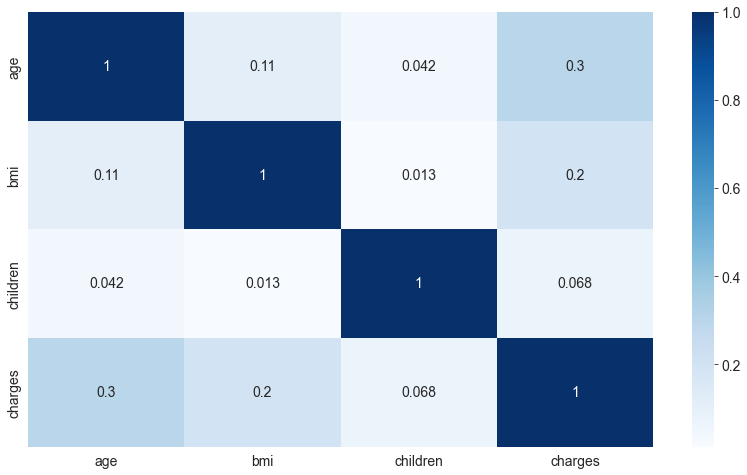

In [29]:
sns.heatmap(medical_ins.corr(),cmap="Blues",annot=True)

Apart from the Smoker attribute which have only two input value (yes or no) ,The age factor is the most important factor to determine the charges. 


**Now we came at the point where we have analyze our data completely and now we are ready to create and train our model to predict the medical expenses .**

### In the visualization part , we saw that when we drawn the scatter plot , It gives us the different clusters for the smoker and the non smoker .<br> 
So we will create two different  models at first , one for the smoker and other for the non smoker .

<h1 style="color:red; font-family:cursive;"><center>MODEL</center></h1> 

In [30]:
nonsmokers_df=medical_ins[medical_ins.smoker=='no']

In [31]:
nonsmokers_df

age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]

So we have a total of 1337 rows of data (mix of smokers and non smokers ) out of which non smokers are 1064.

<AxesSubplot:xlabel='age', ylabel='charges'>

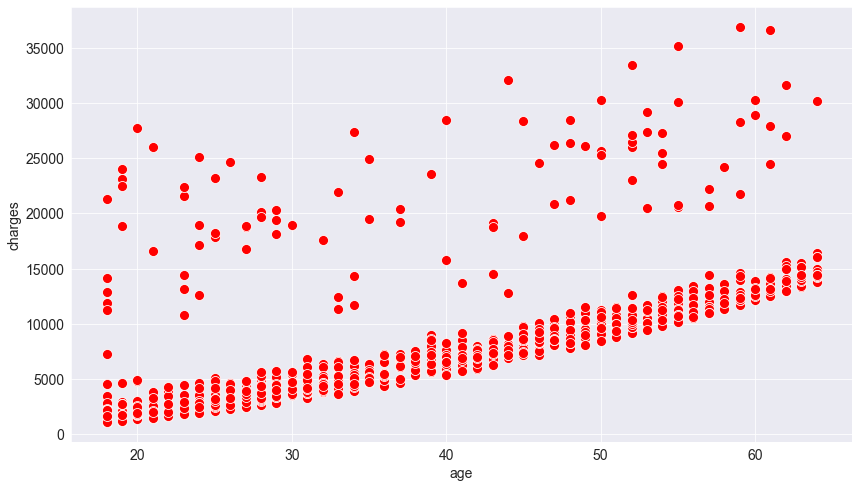

In [32]:
sns.scatterplot(x=nonsmokers_df.age,y=nonsmokers_df.charges,color="red",s=100)

We can see here that the the largest cluster shows a linear relationship between age and charges where with increase in age increases the charges linearly. <br>
Some of the outliers are also available with exceptional high medical charges which are present because of the reason of accidents or some major health issues.

So to train the linear  model  we will try to fit a line in the cluster . The line equation y=wx+b

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.

In [33]:
def estimate_charges(age, w, b):
    return  w * age + b

The estimate charges function will act as our model.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.

In [34]:
w = 50
b = 100

In [35]:
NonS_age=nonsmokers_df.age


In [36]:
estimated_charges=estimate_charges(NonS_age,w,b)

Text(0, 0.5, 'charges')

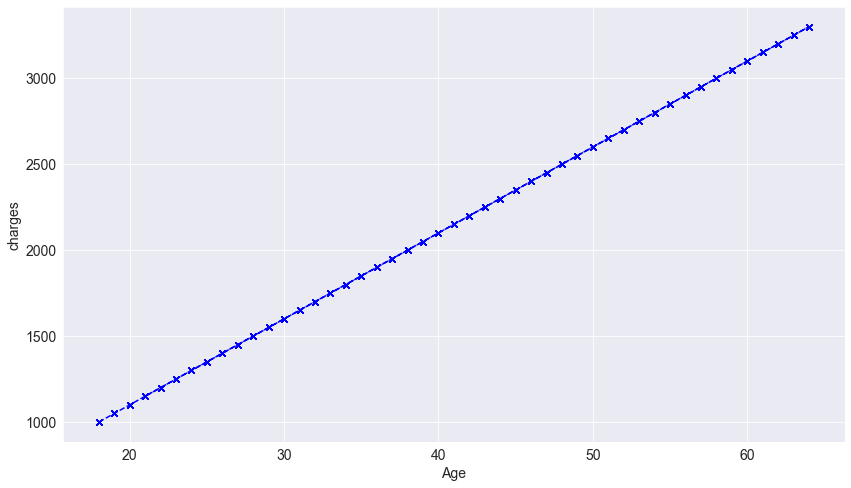

In [37]:
plt.plot(NonS_age,estimated_charges,'b--x')
plt.xlabel("Age")
plt.ylabel("charges")

As expected we got a atraight line with intercept defined 100 and slope 50.

Lets compare these charges with target charges

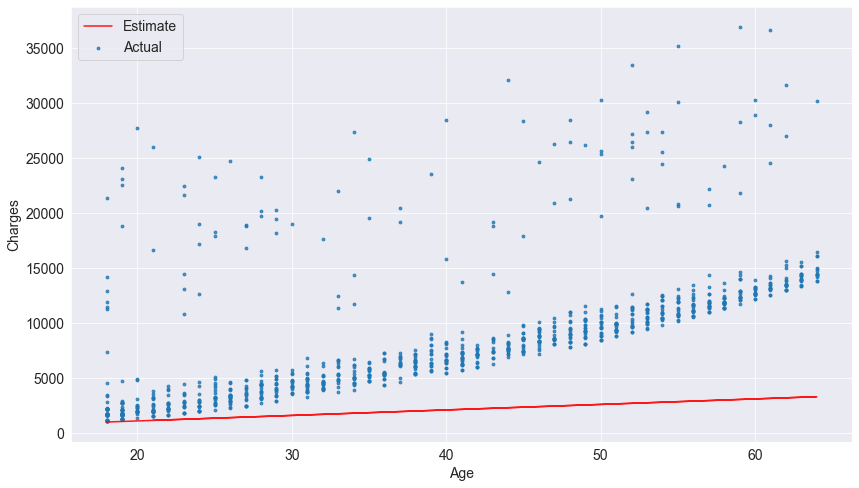

In [38]:
target = nonsmokers_df.charges

plt.plot(NonS_age, estimated_charges, 'r', alpha=0.9);
plt.scatter(NonS_age, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly ,our estimates for w and b are quite poor. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [39]:
def try_parameters(w, b):
    ages = nonsmokers_df.age
    target = nonsmokers_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

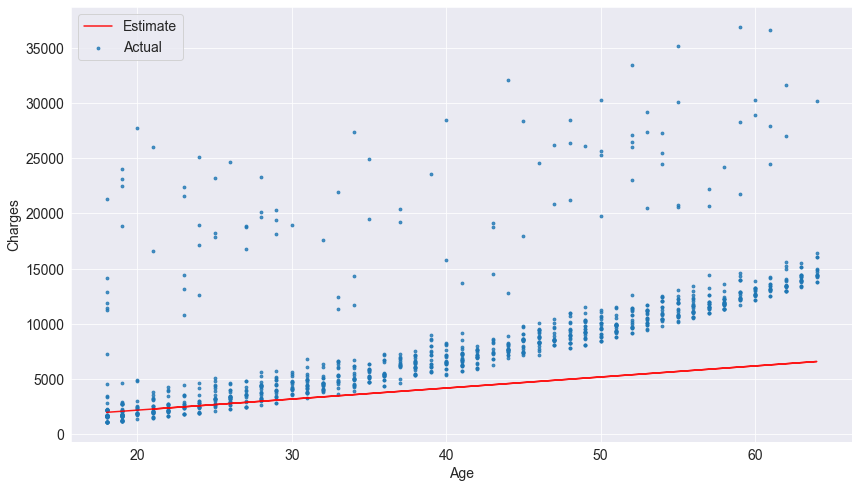

In [40]:
try_parameters(100,200)

Lets change the value of slope and bias. So that line get fit perfectly to the output.

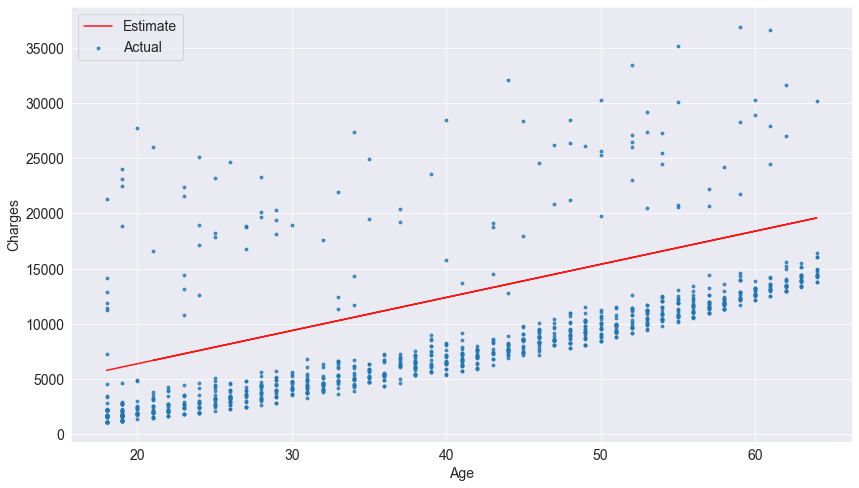

In [41]:
try_parameters(300,400)

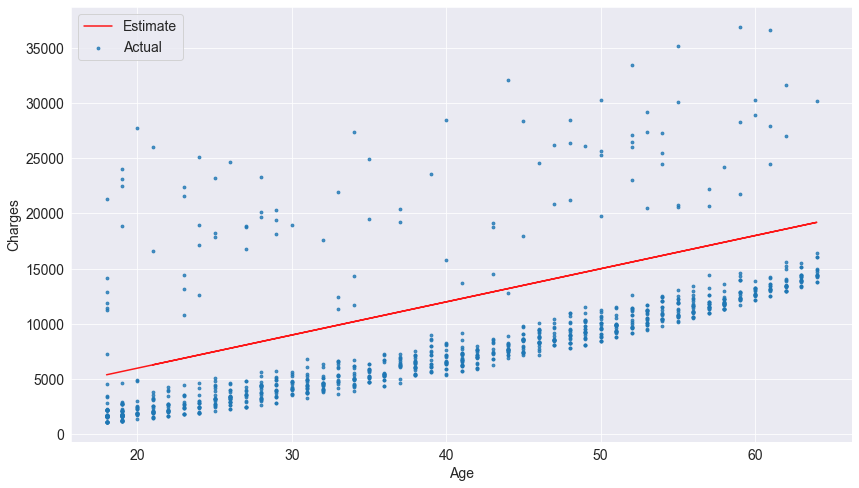

In [42]:
try_parameters(300,0)

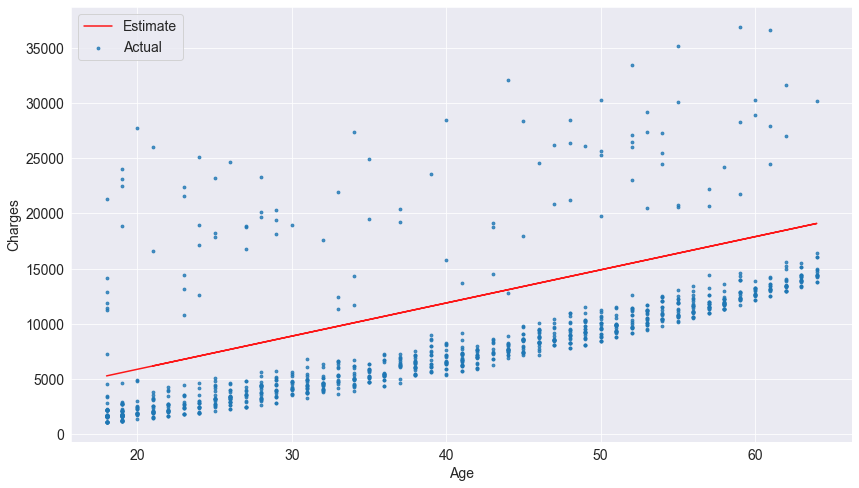

In [43]:
try_parameters(300,-100)

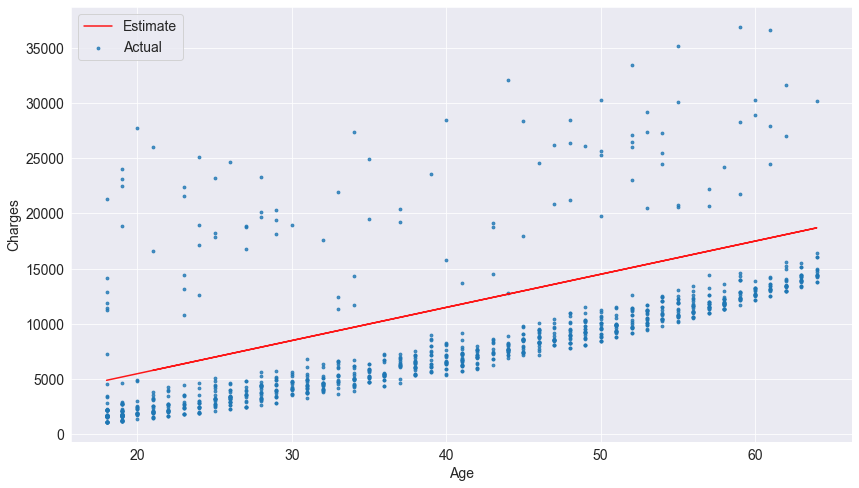

In [44]:
try_parameters(300,-500)

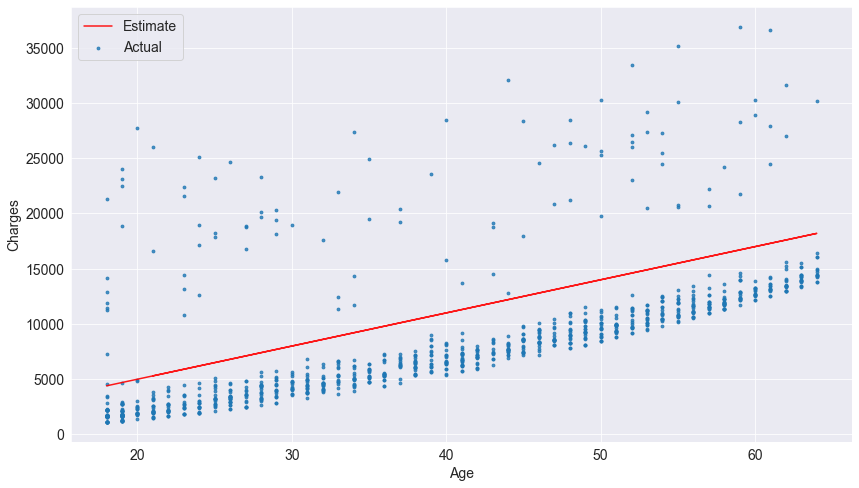

In [45]:
try_parameters(300,-1000)

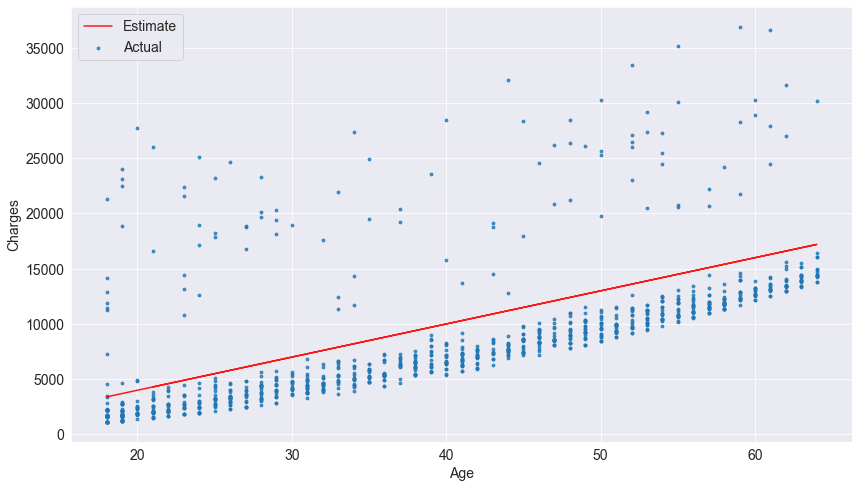

In [46]:
try_parameters(300,-2000)

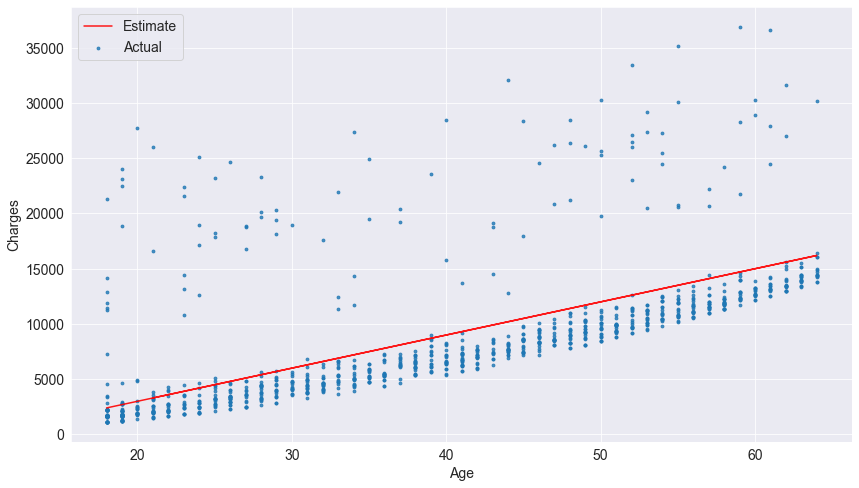

In [47]:
try_parameters(300,-3000)

Yeah , this seems quite fair that line started closely fitting into the outputs.<br> Let try some more values. 

But before evaluating  more predictions, we gonna define first here the Loss/Cost Function which calculates error.<br>
These values of slope and bias are predicted not actual , so it's obvious that there might be loss/error predictions.<br>
This can be visualized by the following :
<img src="https://miro.medium.com/max/624/0*sDmAdS2uFhE4Vqb7">


### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">



Let's define a function to compute the RMSE.

In [48]:
def rmse(predicted,targets):
    return np.sqrt(np.mean(np.square(predicted-targets)))

In [49]:
w=50
b=1000

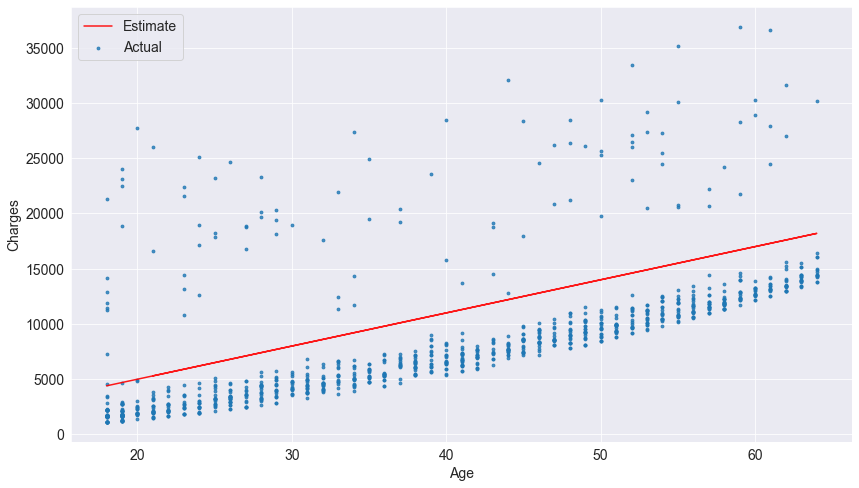

In [50]:
try_parameters(300,-1000)

In [51]:
target=nonsmokers_df.charges
predicted=estimate_charges(NonS_age,w,b)

In [52]:
rmse(predicted,target)

7807.534048248412

This is a quite high loss that means for every prediction we are pridicting 7800 rupees more than the actual charges which is quite high.<br>
So we will try to reduce loss by changing input parameters.<br>
Let modify the try_parameters method by adding rmse to it.

In [53]:
def try_parameters(w, b):
    ages = nonsmokers_df.age
    target = nonsmokers_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    print("LOSS = ",rmse(estimated_charges,target))

LOSS =  6285.060000725581


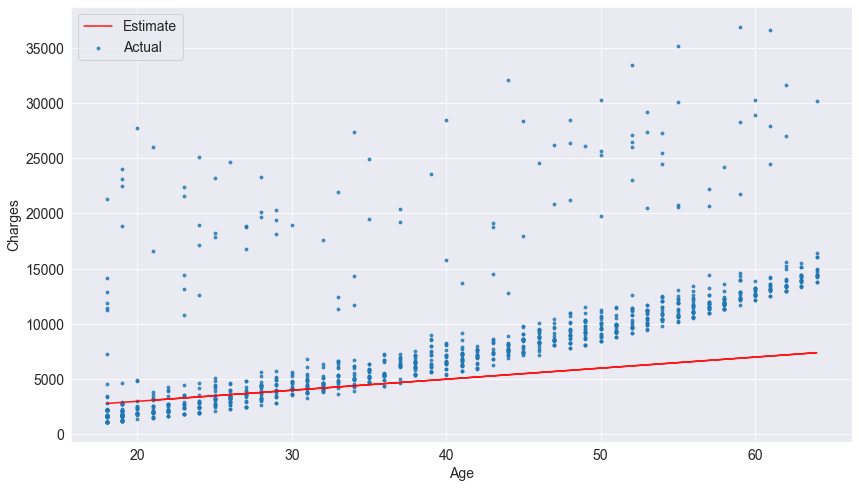

In [54]:
try_parameters(100,1000)

LOSS =  5255.688032459636


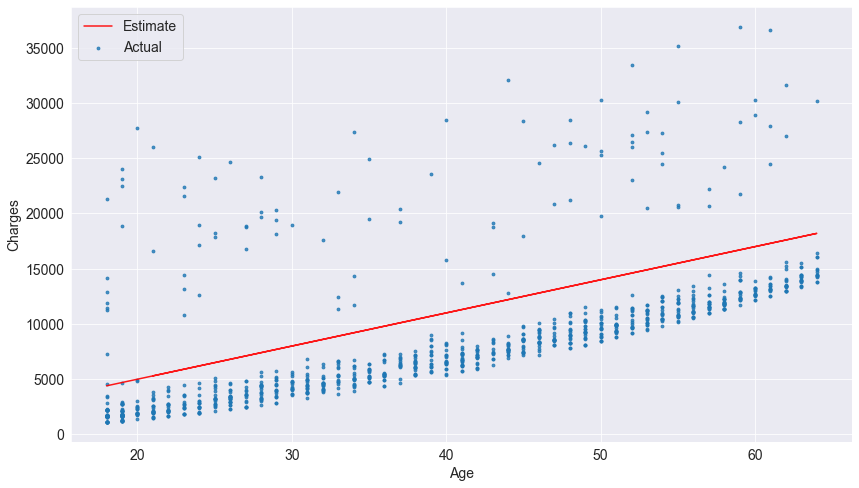

In [55]:
try_parameters(300,-1000)

Seems loss gets reduced by a large amount.Try some more parameters.

LOSS =  4705.696807404537


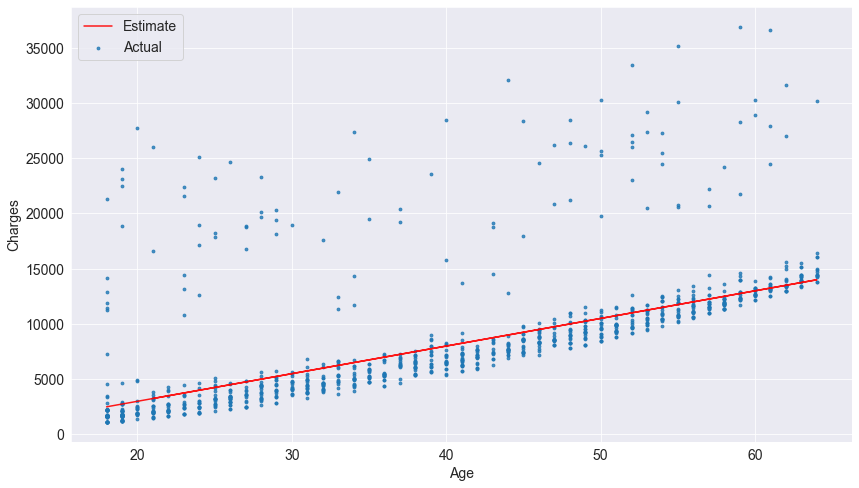

In [56]:
try_parameters(250,-2000)

LOSS =  4793.904061890193


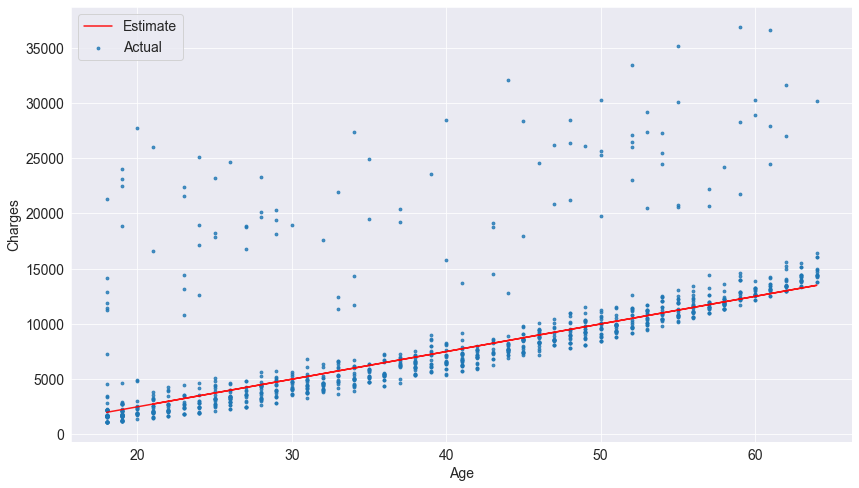

In [57]:
try_parameters(250,-2500)

So 4705 is the loss that we achieved which seems okay for predictions.

**We have done estimations and we are able to find a good model that helps us in good prediction with a bearable loss.<br>
But all we have done is manually , Now we gonna compare and check our model with the Inbuilt library of Python -"Linear Regression with Scikit Learn" which have inbuilt linear regression model.** 

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model=LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [60]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [61]:
inputs = nonsmokers_df[['age']]
targets = nonsmokers_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [62]:
model.fit(inputs, targets)

LinearRegression()

So the model is finally created .

Lets try for some values of age. **Remmeber that for input we need to pass 2d array or input must be 2 dimensional .** 

In [63]:
test_ages=np.array([[23],[26],[24]])


In [64]:
model.predict(test_ages)

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4055.30443855, 4857.05117705, 4322.55335138])

Let's predict for the whole inputs

In [65]:
predictions=model.predict(inputs)

Let's compute the RMSE loss to evaluate the model.

In [66]:
rmse(predictions,targets)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

In [67]:
# w
model.coef_ # this is the bias w that the model has predicted

array([267.24891283])

In [68]:
# b
model.intercept_

-2091.4205565650864

So these are the constants "best" generated by the model .
<br> So lets try these in the try_parameter method to visualize.

LOSS =  4662.505766636395


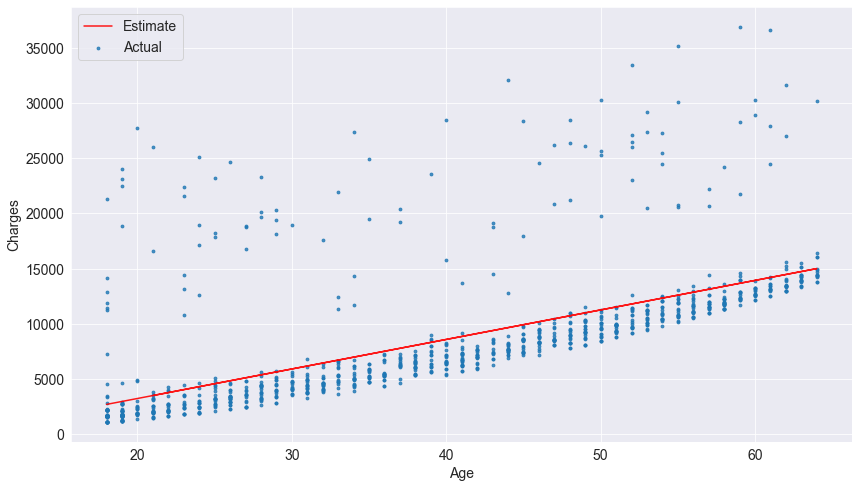

In [69]:
try_parameters(model.coef_,model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers. 


**As we've seen above, it takes just a few lines of code to train a machine learning model using `scikit-learn`.**

In [70]:
# Create inputs and targets
inputs, targets = nonsmokers_df[['age']], nonsmokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


**Till here we have used only one input feature for the output prediction, Now we will be using more than onbe feature .**  

**Let's try seconfd feature as bmi**.


In [71]:
# Create inputs and targets
inputs, targets = nonsmokers_df[['age','bmi']], nonsmokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


BMI feature doesnt created any change in the loss as we saw earlier that bmi feature has very less correlation with charges.

In [72]:
nonsmokers_df.charges.corr(nonsmokers_df.bmi)

0.08403654312833271

Very Low correlation.

In [73]:
model.intercept_,model.coef_

(-2293.6320906488727, array([266.87657817,   7.07547666]))

Clearly, BMI has a much lower weightage. It has a tiny contribution, and even that is probably accidental. 

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [74]:
nonsmokers_df.charges.corr(nonsmokers_df.children)

0.13892870453542205

In [75]:
# Create inputs and targets
inputs, targets = nonsmokers_df[['age','bmi','children']], nonsmokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [76]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

Although there is heavy weightage of children attribute but still no reduction in loss. 

Lets compute the model for whole the dataset(both smokers and non smokers).

In [77]:
# Create inputs and targets
inputs, targets = medical_ins[['age','bmi','children']],medical_ins['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


So we can see that the loss is quite high if we are dealing with the whole dataset (by not dividing for smoker and non smoker). 

Lets try for the categorical features. Smoker and region.

In [78]:
medical_ins

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [79]:
smokermap={'yes':1,'no':0}

In [80]:
medical_ins['smokermap']=medical_ins.smoker.map(smokermap)

In [81]:
medical_ins

age     sex     bmi  children smoker     region      charges  smokermap
0      19  female  27.900         0    yes  southwest  16884.92400          1
1      18    male  33.770         1     no  southeast   1725.55230          0
2      28    male  33.000         3     no  southeast   4449.46200          0
3      33    male  22.705         0     no  northwest  21984.47061          0
4      32    male  28.880         0     no  northwest   3866.85520          0
...   ...     ...     ...       ...    ...        ...          ...        ...
1333   50    male  30.970         3     no  northwest  10600.54830          0
1334   18  female  31.920         0     no  northeast   2205.98080          0
1335   18  female  36.850         0     no  southeast   1629.83350          0
1336   21  female  25.800         0     no  southwest   2007.94500          0
1337   61  female  29.070         0    yes  northwest  29141.36030          1

[1338 rows x 8 columns]

**SEX ATTRIBUTE MAPPING TO BINARY**

In [82]:
sex_codes = {'female': 0, 'male': 1}

In [83]:
medical_ins['sex_codes']=medical_ins.sex.map(sex_codes)

In [84]:
medical_ins

age     sex     bmi  children smoker     region      charges  smokermap  \
0      19  female  27.900         0    yes  southwest  16884.92400          1   
1      18    male  33.770         1     no  southeast   1725.55230          0   
2      28    male  33.000         3     no  southeast   4449.46200          0   
3      33    male  22.705         0     no  northwest  21984.47061          0   
4      32    male  28.880         0     no  northwest   3866.85520          0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1333   50    male  30.970         3     no  northwest  10600.54830          0   
1334   18  female  31.920         0     no  northeast   2205.98080          0   
1335   18  female  36.850         0     no  southeast   1629.83350          0   
1336   21  female  25.800         0     no  southwest   2007.94500          0   
1337   61  female  29.070         0    yes  northwest  29141.36030          1   

      sex_codes  
0             0  
1             1  
2             1  
3             1  
4             1  
...         ...  
1333          1  
1334          0  
1335          0  
1336          0  
1337          0  

[1338 rows x 9 columns]


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

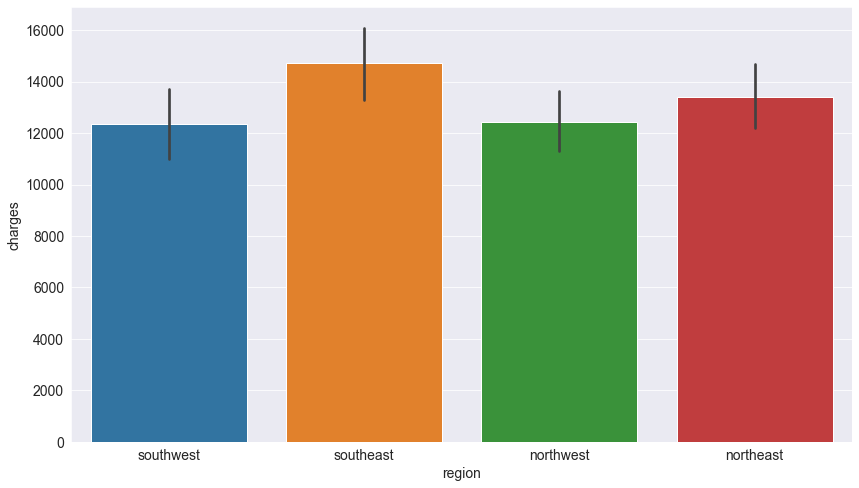

In [85]:
sns.barplot(data=medical_ins, x='region', y='charges');

In [86]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_ins[['region']])

OneHotEncoder()

In [87]:
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [88]:
one_hot = enc.transform(medical_ins[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [89]:
medical_ins[['northeast','northwest','southeast','southwest']]=one_hot

In [90]:
medical_ins

age     sex     bmi  children smoker     region      charges  smokermap  \
0      19  female  27.900         0    yes  southwest  16884.92400          1   
1      18    male  33.770         1     no  southeast   1725.55230          0   
2      28    male  33.000         3     no  southeast   4449.46200          0   
3      33    male  22.705         0     no  northwest  21984.47061          0   
4      32    male  28.880         0     no  northwest   3866.85520          0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1333   50    male  30.970         3     no  northwest  10600.54830          0   
1334   18  female  31.920         0     no  northeast   2205.98080          0   
1335   18  female  36.850         0     no  southeast   1629.83350          0   
1336   21  female  25.800         0     no  southwest   2007.94500          0   
1337   61  female  29.070         0    yes  northwest  29141.36030          1   

      sex_codes  northeast  northwest  southeast  southwest  
0             0        0.0        0.0        0.0        1.0  
1             1        0.0        0.0        1.0        0.0  
2             1        0.0        0.0        1.0        0.0  
3             1        0.0        1.0        0.0        0.0  
4             1        0.0        1.0        0.0        0.0  
...         ...        ...        ...        ...        ...  
1333          1        0.0        1.0        0.0        0.0  
1334          0        1.0        0.0        0.0        0.0  
1335          0        0.0        0.0        1.0        0.0  
1336          0        0.0        0.0        0.0        1.0  
1337          0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

dataset for nonsmoker

## SMOKER_FINAL_DF

In [91]:
smoker_df_final=medical_ins[medical_ins.smokermap==1]

In [92]:
smoker_df_final

age     sex     bmi  children smoker     region      charges  smokermap  \
0      19  female  27.900         0    yes  southwest  16884.92400          1   
11     62  female  26.290         0    yes  southeast  27808.72510          1   
14     27    male  42.130         0    yes  southeast  39611.75770          1   
19     30    male  35.300         0    yes  southwest  36837.46700          1   
23     34  female  31.920         1    yes  northeast  37701.87680          1   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1313   19  female  34.700         2    yes  southwest  36397.57600          1   
1314   30  female  23.655         3    yes  northwest  18765.87545          1   
1321   62    male  26.695         0    yes  northeast  28101.33305          1   
1323   42  female  40.370         2    yes  southeast  43896.37630          1   
1337   61  female  29.070         0    yes  northwest  29141.36030          1   

      sex_codes  northeast  northwest  southeast  southwest  
0             0        0.0        0.0        0.0        1.0  
11            0        0.0        0.0        1.0        0.0  
14            1        0.0        0.0        1.0        0.0  
19            1        0.0        0.0        0.0        1.0  
23            0        1.0        0.0        0.0        0.0  
...         ...        ...        ...        ...        ...  
1313          0        0.0        0.0        0.0        1.0  
1314          0        0.0        1.0        0.0        0.0  
1321          1        1.0        0.0        0.0        0.0  
1323          0        0.0        0.0        1.0        0.0  
1337          0        0.0        1.0        0.0        0.0  

[274 rows x 13 columns]

## NON SMOKER FINAL DATAFRAME

In [93]:
nonsmoker_df_final=medical_ins[medical_ins.smokermap==0]

In [94]:
nonsmoker_df_final

age     sex     bmi  children smoker     region      charges  smokermap  \
1      18    male  33.770         1     no  southeast   1725.55230          0   
2      28    male  33.000         3     no  southeast   4449.46200          0   
3      33    male  22.705         0     no  northwest  21984.47061          0   
4      32    male  28.880         0     no  northwest   3866.85520          0   
5      31  female  25.740         0     no  southeast   3756.62160          0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1332   52  female  44.700         3     no  southwest  11411.68500          0   
1333   50    male  30.970         3     no  northwest  10600.54830          0   
1334   18  female  31.920         0     no  northeast   2205.98080          0   
1335   18  female  36.850         0     no  southeast   1629.83350          0   
1336   21  female  25.800         0     no  southwest   2007.94500          0   

      sex_codes  northeast  northwest  southeast  southwest  
1             1        0.0        0.0        1.0        0.0  
2             1        0.0        0.0        1.0        0.0  
3             1        0.0        1.0        0.0        0.0  
4             1        0.0        1.0        0.0        0.0  
5             0        0.0        0.0        1.0        0.0  
...         ...        ...        ...        ...        ...  
1332          0        0.0        0.0        0.0        1.0  
1333          1        0.0        1.0        0.0        0.0  
1334          0        1.0        0.0        0.0        0.0  
1335          0        0.0        0.0        1.0        0.0  
1336          0        0.0        0.0        0.0        1.0  

[1064 rows x 13 columns]

##  Final Model for smoker

In [95]:
input_cols = ['age', 'bmi', 'children', 'smokermap', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df_final[input_cols], smoker_df_final['charges']
model_smoker=LinearRegression().fit(inputs,targets)


In [96]:
model_smoker.coef_

array([ 2.67404386e+02,  1.47554563e+03,  1.82736551e+02, -1.13686838e-13,
       -3.88121649e+02,  7.54585021e+02,  6.48669959e+01, -1.13815350e+03,
        3.18701480e+02])

In [97]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model_smoker.coef_, model_smoker.intercept_)
})
weights_df

feature        weight
0        age  2.674044e+02
1        bmi  1.475546e+03
2   children  1.827366e+02
3  smokermap -1.136868e-13
4  sex_codes -3.881216e+02
5  northeast  7.545850e+02
6  northwest  6.486700e+01
7  southeast -1.138153e+03
8  southwest  3.187015e+02
9          1 -2.342635e+04

In [98]:
testval=[[20,25,1,1,1,1,0,0,0]]
model_smoker.predict(testval)

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([19359.57405415])

In [99]:
predictions=model_smoker.predict(inputs)

In [100]:
loss=rmse(predictions,targets)
loss

5668.4678821121515

## Final Model for NONSMOKER

In [101]:
nonsmoker_df_final

age     sex     bmi  children smoker     region      charges  smokermap  \
1      18    male  33.770         1     no  southeast   1725.55230          0   
2      28    male  33.000         3     no  southeast   4449.46200          0   
3      33    male  22.705         0     no  northwest  21984.47061          0   
4      32    male  28.880         0     no  northwest   3866.85520          0   
5      31  female  25.740         0     no  southeast   3756.62160          0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1332   52  female  44.700         3     no  southwest  11411.68500          0   
1333   50    male  30.970         3     no  northwest  10600.54830          0   
1334   18  female  31.920         0     no  northeast   2205.98080          0   
1335   18  female  36.850         0     no  southeast   1629.83350          0   
1336   21  female  25.800         0     no  southwest   2007.94500          0   

      sex_codes  northeast  northwest  southeast  southwest  
1             1        0.0        0.0        1.0        0.0  
2             1        0.0        0.0        1.0        0.0  
3             1        0.0        1.0        0.0        0.0  
4             1        0.0        1.0        0.0        0.0  
5             0        0.0        0.0        1.0        0.0  
...         ...        ...        ...        ...        ...  
1332          0        0.0        0.0        0.0        1.0  
1333          1        0.0        1.0        0.0        0.0  
1334          0        1.0        0.0        0.0        0.0  
1335          0        0.0        0.0        1.0        0.0  
1336          0        0.0        0.0        0.0        1.0  

[1064 rows x 13 columns]

In [102]:
input_cols_ns = ['age', 'bmi', 'children', 'smokermap', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
inputsns, targetsns = nonsmoker_df_final[input_cols], nonsmoker_df_final['charges']
model_nonsmoker=LinearRegression().fit(inputs,targets)

In [103]:
predicted_ns=model_nonsmoker.predict(inputsns)

In [104]:
loss=rmse(predicted,targetsns)
loss

7807.534048248412

In [105]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols_ns, 1),
    'weight': np.append(model_nonsmoker.coef_, model_nonsmoker.intercept_)
})
weights_df

feature        weight
0        age  2.674044e+02
1        bmi  1.475546e+03
2   children  1.827366e+02
3  smokermap -1.136868e-13
4  sex_codes -3.881216e+02
5  northeast  7.545850e+02
6  northwest  6.486700e+01
7  southeast -1.138153e+03
8  southwest  3.187015e+02
9          1 -2.342635e+04

# COMBINED MODEL FOR BOTH

In [106]:
medical_ins

age     sex     bmi  children smoker     region      charges  smokermap  \
0      19  female  27.900         0    yes  southwest  16884.92400          1   
1      18    male  33.770         1     no  southeast   1725.55230          0   
2      28    male  33.000         3     no  southeast   4449.46200          0   
3      33    male  22.705         0     no  northwest  21984.47061          0   
4      32    male  28.880         0     no  northwest   3866.85520          0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1333   50    male  30.970         3     no  northwest  10600.54830          0   
1334   18  female  31.920         0     no  northeast   2205.98080          0   
1335   18  female  36.850         0     no  southeast   1629.83350          0   
1336   21  female  25.800         0     no  southwest   2007.94500          0   
1337   61  female  29.070         0    yes  northwest  29141.36030          1   

      sex_codes  northeast  northwest  southeast  southwest  
0             0        0.0        0.0        0.0        1.0  
1             1        0.0        0.0        1.0        0.0  
2             1        0.0        0.0        1.0        0.0  
3             1        0.0        1.0        0.0        0.0  
4             1        0.0        1.0        0.0        0.0  
...         ...        ...        ...        ...        ...  
1333          1        0.0        1.0        0.0        0.0  
1334          0        1.0        0.0        0.0        0.0  
1335          0        0.0        0.0        1.0        0.0  
1336          0        0.0        0.0        0.0        1.0  
1337          0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [107]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smokermap', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_ins[input_cols], medical_ins['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [108]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols_ns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0        age    256.856353
1        bmi    339.193454
2   children    475.500545
3  smokermap  23848.534542
4  sex_codes   -131.314359
5  northeast    587.009235
6  northwest    234.045336
7  southeast   -448.012814
8  southwest   -373.041756
9          1 -12525.547811

For the combined model the loss quite seems low and the weightage to each feature seems pretty good.

Hence we can finally use the combined model for the predictions.

### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [111]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5294.222324172337
